<h1 style='color:DarkBlue' align='center'> Regression- SBI Stock price

**Our target here is to predict close price one day before.**

In [1]:
#import libraries
import pandas as pd
import quandl
import datetime as dt


In [2]:
# df=quandl.get("BSE/BOM500124", authtoken="db3AaM88USTLfqXXJg9E")
df_SBI=quandl.get("BSE/BOM500112", authtoken="db3AaM88USTLfqXXJg9E")

df=df_SBI

In [3]:
print(df.shape)
df.head()

(6226, 12)


,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
1995-05-05,177.0,178.0,174.0,175.0,0.0,0.0,0.0,0.0,NaN,NaN,4.0,-2.0
1995-05-08,172.0,174.0,172.0,172.0,0.0,0.0,0.0,0.0,NaN,NaN,2.0,0.0
1995-05-09,174.0,174.0,170.0,172.0,0.0,0.0,0.0,0.0,NaN,NaN,4.0,-2.0
1995-05-10,171.0,172.0,170.0,171.0,0.0,0.0,0.0,0.0,NaN,NaN,2.0,0.0
1995-05-12,169.0,171.0,167.0,171.0,0.0,0.0,0.0,0.0,NaN,NaN,4.0,2.0


In [31]:
df1=df.drop(['WAP','No. of Shares','No. of Trades','Total Turnover','Deliverable Quantity','% Deli. Qty to Traded Qty'],axis=1)


In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6226 entries, 1995-05-05 to 2020-06-30
Data columns (total 6 columns):
Open          6226 non-null float64
High          6226 non-null float64
Low           6226 non-null float64
Close         6226 non-null float64
Spread H-L    6226 non-null float64
Spread C-O    6226 non-null float64
dtypes: float64(6)
memory usage: 340.5 KB


In [33]:
df1.isnull().sum()

Open          0
High          0
Low           0
Close         0
Spread H-L    0
Spread C-O    0
dtype: int64

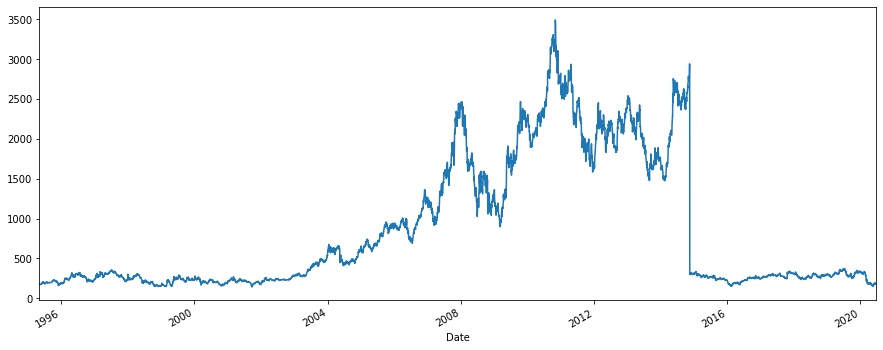

In [34]:
df['Close'].plot(figsize=(15,6))

In [35]:
# First calculate the mid prices from the highest and lowest
high_prices = df.loc[:,'High']
low_prices = df.loc[:,'Low']
df1['mid_prices'] = (high_prices+low_prices)/2.0

In [36]:
#extracting date features
df1['month']=df1.index.month
df1['year']=df1.index.year
df1['dayofweek']=df1.index.dayofweek
df1['dayofyear']=df1.index.dayofyear
df1['quarter']=df1.index.quarter

In [37]:
df1.head()

,Open,High,Low,Close,Spread H-L,Spread C-O,mid_prices,month,year,dayofweek,dayofyear,quarter
Date,,,,,,,,,,,,
1995-05-05,177.0,178.0,174.0,175.0,4.0,-2.0,176.0,5,1995,4,125,2
1995-05-08,172.0,174.0,172.0,172.0,2.0,0.0,173.0,5,1995,0,128,2
1995-05-09,174.0,174.0,170.0,172.0,4.0,-2.0,172.0,5,1995,1,129,2
1995-05-10,171.0,172.0,170.0,171.0,2.0,0.0,171.0,5,1995,2,130,2
1995-05-12,169.0,171.0,167.0,171.0,4.0,2.0,169.0,5,1995,4,132,2


In [38]:
#defining moving avg creating new features
df1['sma60'] = df1['Close'].rolling(window=60, center=False).mean() 
df1['sma60std'] = df1['Close'].rolling(window=60, center=False).std()
# df1['sma30'] = df1['Close'].rolling(window=30, center=False).mean() 
# df1['sma30std'] = df1['Close'].rolling(window=30, center=False).std()
# df1['sma20'] = df1['Close'].rolling(window=20, center=False).mean() 
# df1['sma20std'] = df1['Close'].rolling(window=20, center=False).std()

df1['sma10'] = df1['Close'].rolling(window=10, center=False).mean() 
df1['sma10std'] = df1['Close'].rolling(window=10, center=False).std()

# df1['sma7'] = df1['Close'].rolling(window=6, center=False).mean() 
# df1['sma7std'] = df1['Close'].rolling(window=6, center=False).std()


In [39]:
#defining Target column
df1['1 day before close']=df1['Close'].shift(-1)

In [40]:
# df1=df1.drop('Close',axis=1)

Train -Test split

In [41]:
train=df1.iloc[:-30,:]
train=train.iloc[65:,[0,3,4,5,6,7,9,10,11,12,13,14,15,16]]

In [42]:
train.tail()

,Open,Close,Spread H-L,Spread C-O,mid_prices,month,dayofweek,dayofyear,quarter,sma60,sma60std,sma10,sma10std,1 day before close
Date,,,,,,,,,,,,,,
2020-05-12,164.80,166.70,7.55,1.90,164.675,5,1,133,2,229.937500,59.147941,175.460,9.685608,174.10
2020-05-13,178.90,174.10,8.40,-4.80,174.700,5,2,134,2,227.530833,58.416570,174.440,9.174839,167.95
2020-05-14,171.50,167.95,4.25,-3.55,169.675,5,3,135,2,224.924167,57.505414,172.235,7.520234,166.40
2020-05-15,167.95,166.40,3.95,-1.55,166.725,5,4,136,2,222.364167,56.613159,169.835,4.156190,155.40
2020-05-18,166.80,155.40,11.80,-11.40,160.900,5,0,139,2,219.496667,55.547468,167.495,5.041023,152.85


In [43]:
test=df1.iloc[-30:-1,[0,3,4,5,6,7,9,10,11,12,13,14,15,16]]

test.tail()

,Open,Close,Spread H-L,Spread C-O,mid_prices,month,dayofweek,dayofyear,quarter,sma60,sma60std,sma10,sma10std,1 day before close
Date,,,,,,,,,,,,,,
2020-06-23,189.70,192.45,5.25,2.75,190.375,6,1,175,2,177.320833,12.512452,180.850,6.932211,184.60
2020-06-24,193.65,184.60,10.85,-9.05,189.375,6,2,176,2,177.341667,12.523697,180.530,6.643593,185.25
2020-06-25,182.00,185.25,6.40,3.25,183.600,6,3,177,2,177.263333,12.458024,181.335,6.682857,184.60
2020-06-26,187.90,184.60,4.85,-3.30,186.175,6,4,178,2,177.125833,12.327926,181.870,6.711483,179.30
2020-06-29,183.60,179.30,5.05,-4.30,181.075,6,0,181,2,176.846667,12.079268,182.395,6.219077,178.40


In [44]:
train.columns

Index(['Open', 'Close', 'Spread H-L', 'Spread C-O', 'mid_prices', 'month',
       'dayofweek', 'dayofyear', 'quarter', 'sma60', 'sma60std', 'sma10',
       'sma10std', '1 day before close'],
      dtype='object')

In [45]:
from pycaret.regression import *

In [46]:

reg = setup(data=train, target = '1 day before close',ignore_features=['Close'],
            categorical_features=['month', 'dayofweek', 'dayofyear', 'quarter'],
            normalize=True,session_id=1975)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1975
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(6131, 14)"
4,Missing Values,False
5,Numeric Features,9
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [47]:
compare_models(blacklist = ['huber','tr'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,28.0179,3244.22,55.7155,0.9954,0.0607,0.0372
1,Random Forest,33.7166,5055.91,69.1721,0.9928,0.0723,0.0433
2,Light Gradient Boosting Machine,46.7867,6650.04,81.2365,0.9905,0.1053,0.0692
3,CatBoost Regressor,52.0709,7110.41,83.9165,0.9899,0.1002,0.075
4,Decision Tree,37.8443,7346.39,85.1159,0.9894,0.0764,0.0447
5,Gradient Boosting Regressor,65.4951,12002.8,109.177,0.9829,0.1102,0.0848
6,Extreme Gradient Boosting,65.6657,12190.1,109.961,0.9826,0.1109,0.0853
7,AdaBoost Regressor,97.0369,21774.2,146.88,0.969,0.1996,0.1669
8,Lasso Regression,88.5251,23553.7,152.994,0.9665,0.1892,0.1199
9,Orthogonal Matching Pursuit,94.4818,24747.7,156.919,0.9648,0.2192,0.1399


In [48]:
#Extra trees regresser chosen just for minimum RMSE
ET=create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,28.0842,2473.5091,49.7344,0.9962,0.0502,0.0349
1,33.9916,7740.3838,87.9795,0.9886,0.1025,0.0505
2,28.6099,2950.1048,54.3149,0.9960,0.0571,0.0378
3,26.8431,2509.6739,50.0966,0.9965,0.0490,0.0337
4,28.2396,2539.4175,50.3926,0.9967,0.0594,0.0376
5,25.9863,2480.2610,49.8022,0.9963,0.0465,0.0327
6,29.1117,3372.6125,58.0742,0.9955,0.0525,0.0345
7,23.4587,1879.6923,43.3554,0.9974,0.0653,0.0370
8,28.9439,3900.5012,62.4540,0.9944,0.0657,0.0356
9,26.9104,2595.9939,50.9509,0.9959,0.0591,0.0375


In [49]:
predict_model(ET)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,29.3849,6516.4623,80.7246,0.9905,0.0823,0.0425


,Spread H-L,Spread C-O,sma60,sma60std,sma10std,month_1,month_10,month_11,month_12,month_2,...,dayofyear_96.0,dayofyear_97.0,dayofyear_98.0,dayofyear_99.0,quarter_1,quarter_2,quarter_3,quarter_4,1 day before close,Label
0,2.253915,-2.363558,1.132195,1.343595,1.018619,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2237.15,2173.2565
1,-0.727599,0.085545,-0.772821,-0.572537,-0.484335,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,222.20,220.7660
2,0.361383,-0.088150,2.169852,0.111522,0.427295,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2600.10,2597.9545
3,-0.411143,-0.215526,-0.301050,-0.328231,-0.273733,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,714.40,687.5645
4,-0.532141,-0.252195,-0.708116,-0.457576,-0.325380,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,270.25,270.9815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,-0.260671,-0.302374,-0.732610,-0.341116,-0.003826,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,317.50,295.3045
1836,1.321610,1.641083,0.905175,0.233262,0.686502,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1675.15,1742.4075
1837,0.012350,0.595052,1.461568,0.940071,0.323790,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1861.10,1864.7870
1838,-0.359951,-0.321674,-0.728864,-0.548585,-0.283516,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,253.40,257.1990


In [50]:
final_et=finalize_model(ET)

In [51]:
d=predict_model(estimator=final_et, data=test)
d.tail()

,Open,Close,Spread H-L,Spread C-O,mid_prices,month,dayofweek,dayofyear,quarter,sma60,sma60std,sma10,sma10std,1 day before close,Label
24,189.70,192.45,5.25,2.75,190.375,6,1,175,2,177.320833,12.512452,180.850,6.932211,184.60,199.5150
25,193.65,184.60,10.85,-9.05,189.375,6,2,176,2,177.341667,12.523697,180.530,6.643593,185.25,198.4445
26,182.00,185.25,6.40,3.25,183.600,6,3,177,2,177.263333,12.458024,181.335,6.682857,184.60,199.8360
27,187.90,184.60,4.85,-3.30,186.175,6,4,178,2,177.125833,12.327926,181.870,6.711483,179.30,198.0455
28,183.60,179.30,5.05,-4.30,181.075,6,0,181,2,176.846667,12.079268,182.395,6.219077,178.40,197.8185


In [66]:
d[['Close','Label']].tail()

,Close,Label
24,192.45,199.5150
25,184.60,198.4445
26,185.25,199.8360
27,184.60,198.0455
28,179.30,197.8185


The label contains one day before predicted value for close i.e. for 28 no. close value we have predictecd 27 no Label value.

In [56]:
close=d.Close[1:]
prediction=d.Label.shift(1)[1:]

### As we are predicting price one day before thus we had shifted Label column 1 ahead to calculate actual RMSE 

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse=mean_squared_error(close,prediction)
import numpy as np
print('MSE=',mse)
rmse=np.sqrt(mse)
print('RMSE=',rmse)
MAE=sum(np.abs(prediction-close))/test.shape[0]
print('MAE=',MAE)

MSE= 1010.085222580357
RMSE= 31.78183793584564
MAE= 27.924775862068966


## Above RMSE of 31.78 is actual prediction error

In [68]:
evaluate_model(ET)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…